<a href="https://colab.research.google.com/github/Maks3174/Phy/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/weatherHistory.csv")

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Завдання 1
Виведіть основні числові характеристики для числових ознак. Що потрібно зробити з стовпчиком `Loud Cover`?

In [4]:
print(df.describe())

print(df['Loud Cover'].unique())

if df['Loud Cover'].nunique() == 1:
    df = df.drop(columns=['Loud Cover'])


       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   


# Завдання 2
Подивіться на отриману таблицю, особливо на характеристики `min` та `max`, для яких ознак потрібно побудувати ящики з вусами в першу чергу? Для решти намалюйте гістограми.


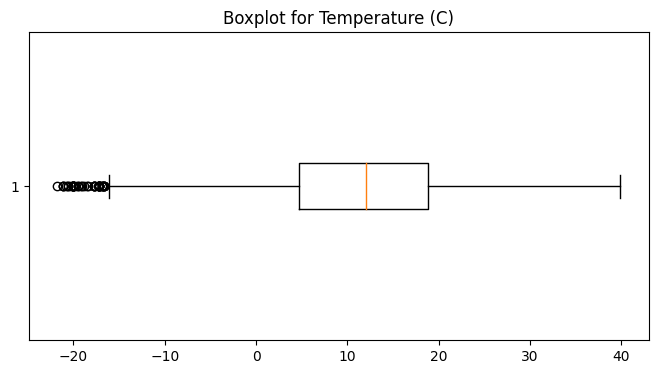

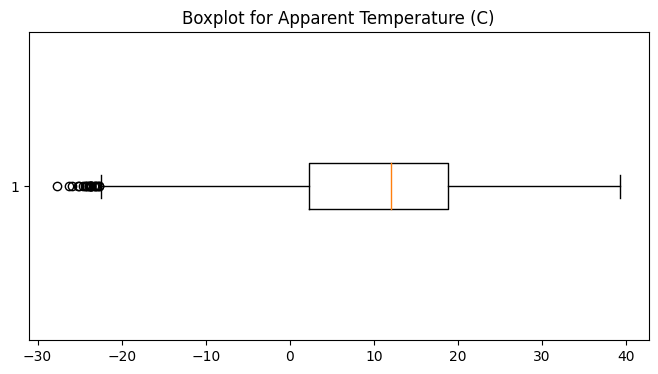

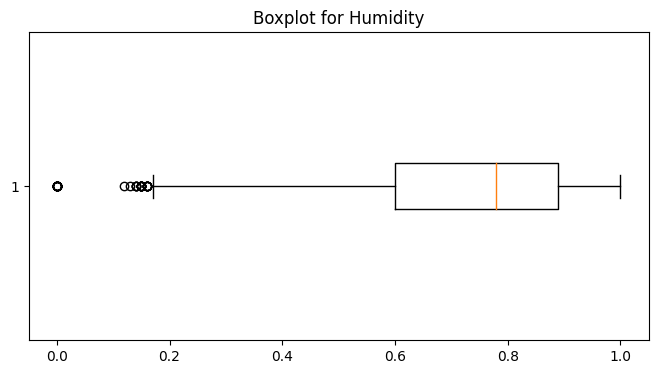

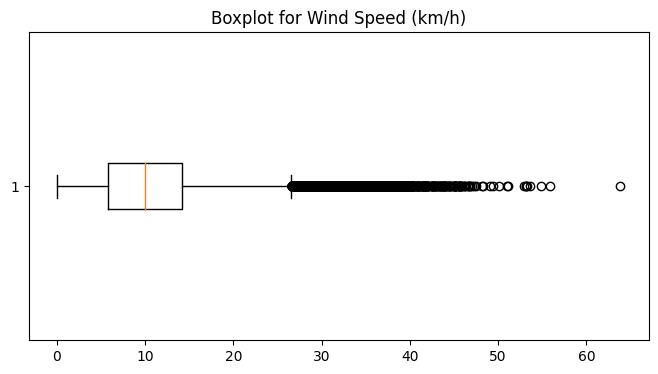

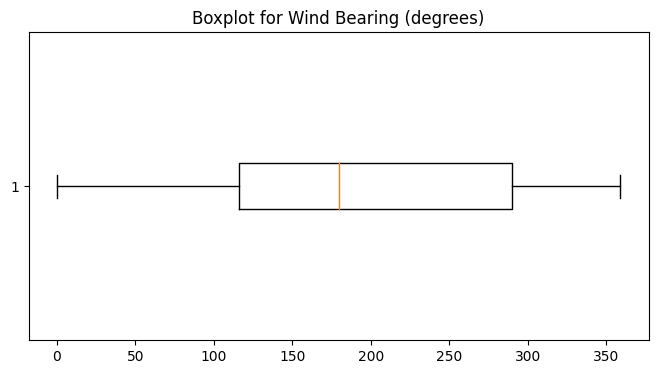

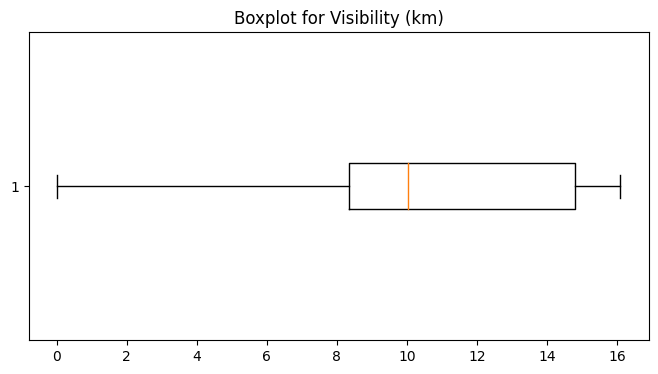

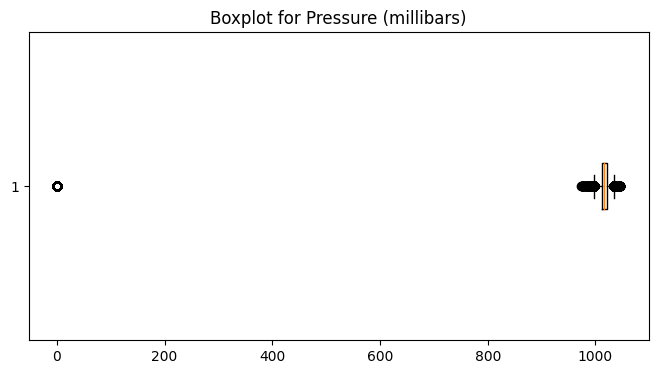

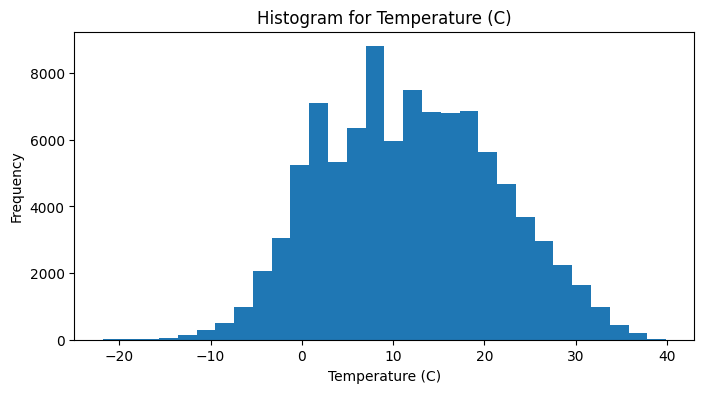

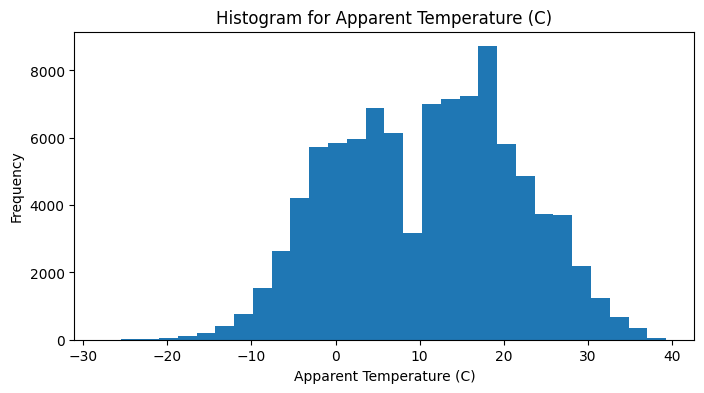

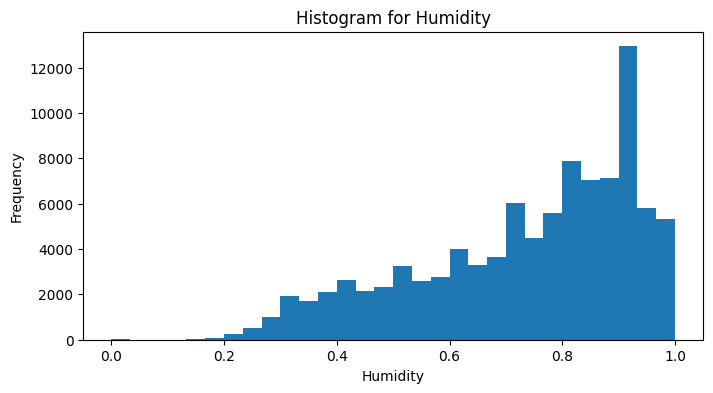

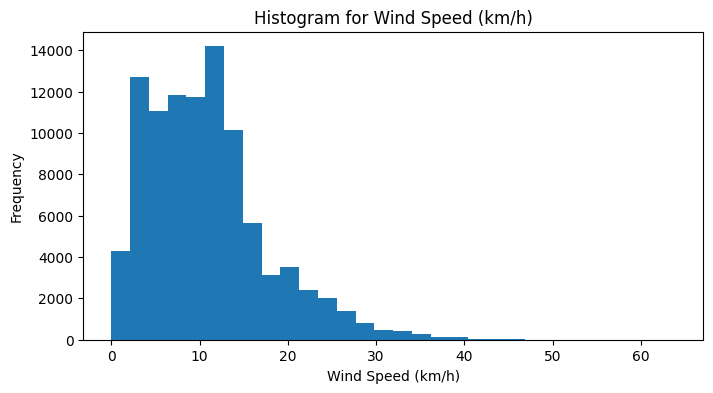

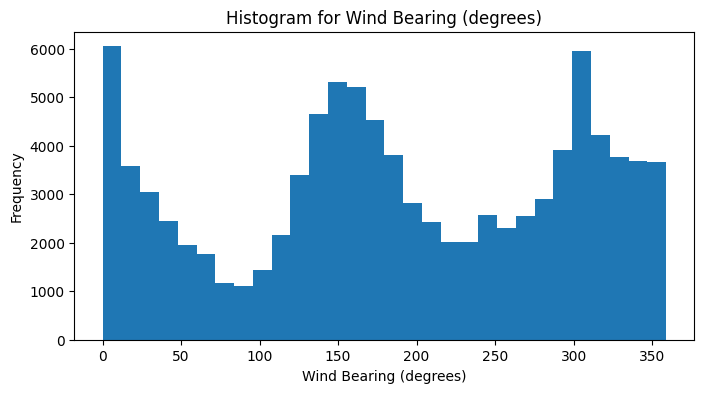

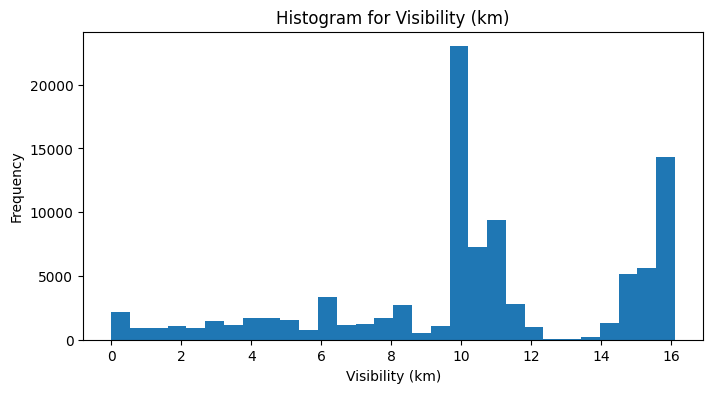

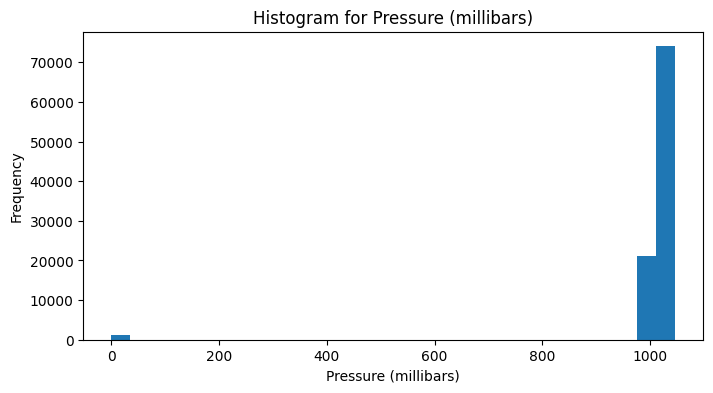

In [6]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot for {col}')
    plt.show()

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Завдання 3
Чи потрібно застосувати квантильний алгоритм для видалення викидів? Якщо так то застосуйте, інакше, що на вашу думку потрібно зробити?

In [7]:
from scipy import stats

for col in numeric_columns:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    if np.any(z_scores > 3):
        print(f'Виявлено викиди в стовпчику {col}')

df_no_outliers = df[(np.abs(stats.zscore(df[numeric_columns].dropna())) < 3).all(axis=1)]


Виявлено викиди в стовпчику Temperature (C)
Виявлено викиди в стовпчику Apparent Temperature (C)
Виявлено викиди в стовпчику Humidity
Виявлено викиди в стовпчику Wind Speed (km/h)
Виявлено викиди в стовпчику Pressure (millibars)


# Завдання 4
Намалюйте матрицю кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму

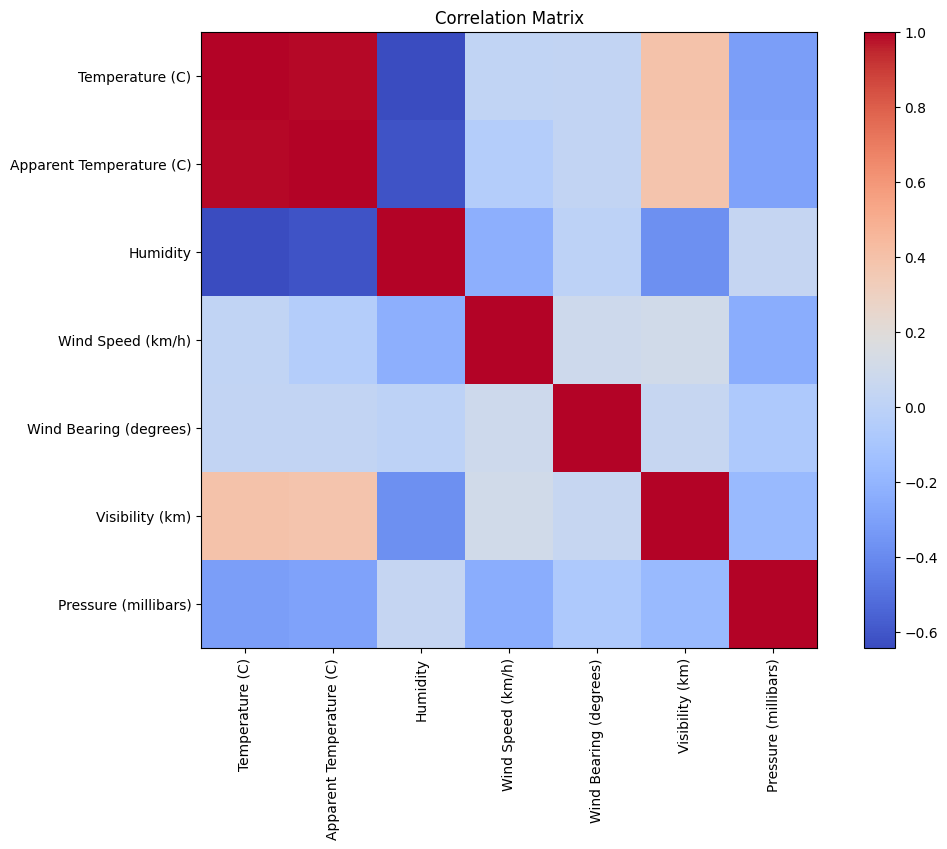

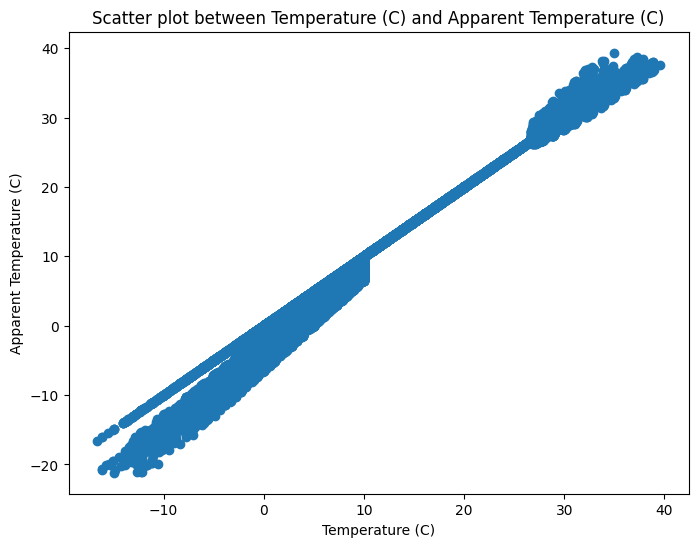

In [10]:
numeric_columns = df_no_outliers.select_dtypes(include=[np.number]).columns
correlation_matrix = df_no_outliers[numeric_columns].corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.index)
plt.title('Correlation Matrix')
plt.show()

most_correlated = correlation_matrix.abs().unstack().sort_values(ascending=False)
most_correlated = most_correlated[most_correlated < 1].idxmax()
x, y = most_correlated

plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers[x], df_no_outliers[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Scatter plot between {x} and {y}')
plt.show()


# Завдання 5
Виведіть характеристики для категоріальних ознак

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(df[col].value_counts())
    print()


Formatted Date
2010-08-02 00:00:00.000 +0200    2
2010-08-02 12:00:00.000 +0200    2
2010-08-02 03:00:00.000 +0200    2
2010-08-02 04:00:00.000 +0200    2
2010-08-02 05:00:00.000 +0200    2
                                ..
2009-03-09 22:00:00.000 +0100    1
2009-03-09 21:00:00.000 +0100    1
2009-03-09 20:00:00.000 +0100    1
2009-03-09 19:00:00.000 +0100    1
2016-09-09 23:00:00.000 +0200    1
Name: count, Length: 96429, dtype: int64

Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and 

# Завдання 6
Виведіть групові ящики з вусами по одній(або декількох) категоріальних ознак. Що по них можна сказати?

<Figure size 1000x600 with 0 Axes>

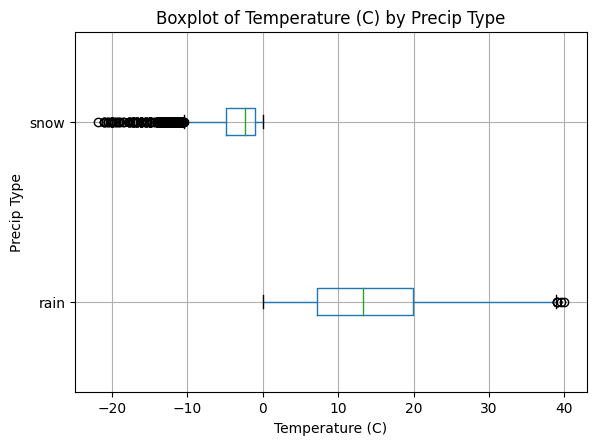

In [12]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Temperature (C)', by='Precip Type', vert=False)
plt.title('Boxplot of Temperature (C) by Precip Type')
plt.suptitle('')
plt.xlabel('Temperature (C)')
plt.show()

